## CE9010: Introduction to Data Science
## Semester 2 2017/18
## Xavier Bresson
<hr>

## Tutorial 8: Neural networks
## Objectives
### $\bullet$ Coding 3-layer neural network
### $\bullet$ Implementing backpropagation
### $\bullet$ Explore results
<hr>

In [1]:
# Import libraries

# math library
import numpy as np

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# computational time
import time

# import mat data
import scipy.io

# dynamic 3D rotations:
#%matplotlib notebook 
# no 3D rotations but cleaner images:
%matplotlib inline    
import matplotlib.pyplot as plt

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# high definition picture
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')

# visualize 2D images
import scipy.ndimage

# import mat data
import scipy.io

# random number
import random

# colormap
import matplotlib.cm as cm 

# for one-hot vector
from scipy.sparse import coo_matrix

## 1. Load training and test datasets
<hr>

In [13]:
X_train = np.load('data/nn_train_test_sets.npz')['X_train']
y_train = np.load('data/nn_train_test_sets.npz')['y_train']
X_test = np.load('data/nn_train_test_sets.npz')['X_test']
y_test = np.load('data/nn_train_test_sets.npz')['y_test']

print('Nb training data:',X_train.shape[1])
print('Nb test data:',X_test.shape[1])
print('Nb data features:',X_train.shape[0])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Nb training data: 1000
Nb test data: 4000
Nb data features: 400
(400, 1000)
(1000, 1)
(400, 4000)
(4000, 1)


## 2. Visualize the datasets
<hr>

Hint: You may use function `display_data`.

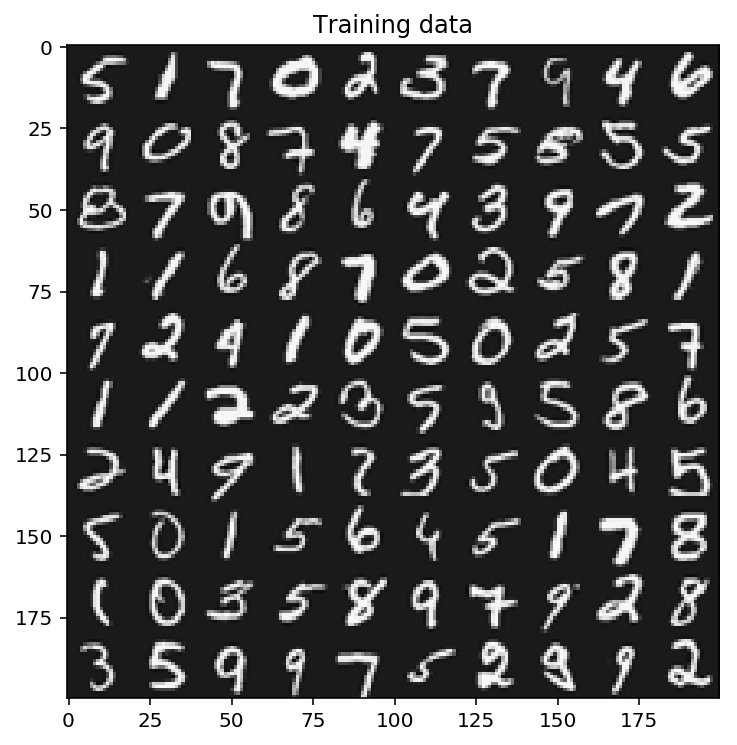

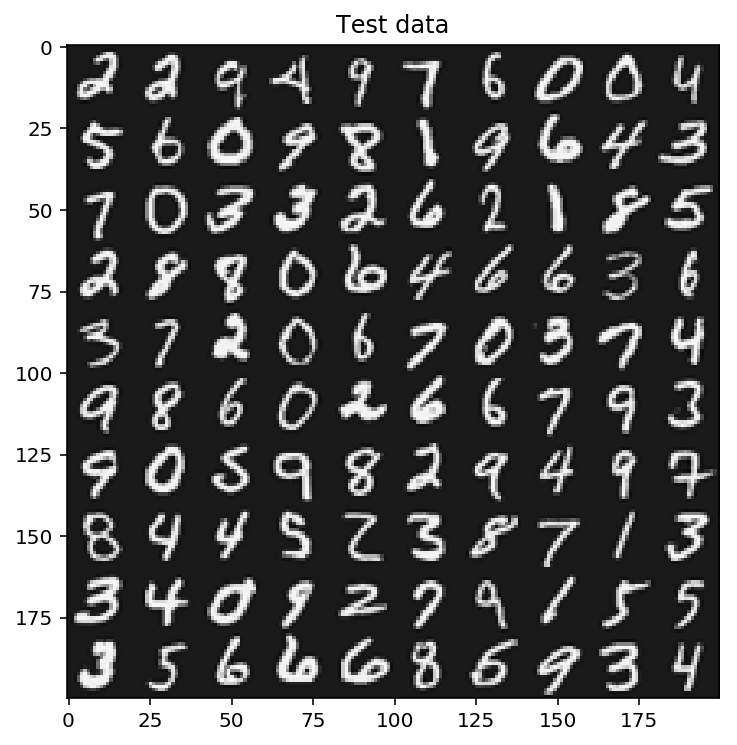

In [3]:
def display_data(X,width,height,nrows,ncols,title):

    big_picture = np.zeros((height*nrows,width*ncols))
    indices_to_display = random.sample(range(X.shape[1]), nrows*ncols)
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0       
        iimg = X[:,idx].reshape(width,height).T       
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    plt.title(title)
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)
    
    
#YOUR CODE HERE
display_data(X_train,20,20,10,10,'Training data')
display_data(X_test,20,20,10,10,'Test data')

## 3. Z-score the datasets
<hr>


In [4]:
#YOUR CODE HERE
X_train -= X_train.mean(axis=0)
X_train /= np.std(X_train,axis=0)

X_test -= X_test.mean(axis=0)
X_test /= np.std(X_test,axis=0)

## 4. Implement a 3-layer neural network classifier.
<hr>

The input layer has $n_1=d=400$ neurons.
The hidden layer has $n_2=25$ neurons.
The output layer has $n_3=K=10$ neurons.


In [5]:
K = 10 # number of classes
n = X_train.shape[1] # number of training data

n1 = 400
n2 = 25
n3 = K

## 4.1 Function definitions
<hr>


In [6]:
# one-hot transform function
def convert_to_one_hot(X,max_val=None):
    N = X.size
    data = np.ones(N,dtype=int)
    sparse_out = coo_matrix((data,(np.arange(N),X.ravel())), shape=(N,max_val))
    return np.array(sparse_out.todense().T)

#Example:
#a = np.array([1, 7, 5, 3, 2, 4, 0, 4])
#print(a)
#print(convert_to_one_hot(a,10)) 


# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# derivate of the sigmoid function
def sigmoid_derivate(z):
    sigm = sigmoid(z)
    return sigm* (1-sigm)


# accuracy function
def compute_acc(y,ygt):
    diff = (y == ygt).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    return accuracy

## 4.2 Convert the training label vector `y_train`, with values in ${1,2,...,K}$, to one-hot vector.
<hr>

Hint: You may use function `convert_to_one_hot(y,K)` with `y` having values in ${0,1,...,K-1}$.

In [7]:
#YOUR CODE HERE
Yhat = convert_to_one_hot(y_train-1,max_val=K)
print(Yhat.shape)

(10, 1000)


## 4.3 Initialize the weight matrices $W^1$ and $W^2$ with the formula
$$
W^l = U\Big[ -\frac{2}{\sqrt{n_l}}, \frac{2}{\sqrt{n_l}} \Big],
$$
with $U$ being the uniform distribution.
<hr>

Hint: You may use function `np.random.uniform`.

In [8]:
#YOUR CODE HERE
a = 2/ np.sqrt(n1)
W1 = np.random.uniform(-a,a,[n2,n1+1])
a = 2/ np.sqrt(n2)
W2 = np.random.uniform(-a,a,[n3,n2+1])

print(W1.shape)
print(W2.shape)

(25, 401)
(10, 26)


## 4.4 Implement the backpropagation algorithm from Lecture 10.
<hr>

The loss function is the multi-class regression loss. The learning rate is $\tau=0.2$ and the number of iterations is $5000$. Do not use any regularization at this moment $\lambda=0$. 

Note the accuracy of the train set and the test set for $n_2=25$ and $\lambda=0$.

Hint: Implement slide 53 of Lecture 10.

In [9]:
tau = 0.2 # learning rate
lamb = 0  # regularization

# iterate
for iter in range(5000):
    
    # forward pass
    #YOUR CODE HERE
    Y1 = X_train
    Y1bias = np.insert(Y1,0,1,axis=0)
    Y2 = sigmoid(W1.dot(Y1bias))
    Y2bias = np.insert(Y2,0,1,axis=0)
    Y3 = sigmoid(W2.dot(Y2bias))
    
    # backward pass
    #YOUR CODE HERE
    Delta3 = Y3 - Yhat
    Grad2 = 1/n* Delta3.dot(Y2bias.T)
    Grad2 += 2* lamb* W2
    W2 = W2 - tau* Grad2
    W2bar = W2[:,1:n2+1]
    Delta2 = ( W2bar.T.dot(Delta3) ) * sigmoid_derivate(Y2)
    Grad1 = 1/n* Delta2.dot(Y1bias.T)
    Grad1 += 2* lamb* W1
    W1 = W1 - tau* Grad1
    
    # print intermediate result
    if not iter%500:
        
        # loss 
        loss = -1/n* ( np.sum(Yhat* np.log(Y3+1e-10)) + \
                      np.sum((1-Yhat)* np.log((1-Y3)+1e-10)) ) + \
                lamb* ( np.sum(W1) + np.sum(W2) )
        
        # train accuracy
        Y3_classes = np.argmax(Y3,axis=0)
        Ygt = np.argmax(Yhat,axis=0)
        acc = compute_acc(Y3_classes,Ygt)
        
        # test accuracy (with forward pass on the test set)
        Y1_test = X_test
        Y1bias_test = np.insert(Y1_test,0,1,axis=0)
        Y2_test = sigmoid(W1.dot(Y1bias_test))
        Y2bias_test = np.insert(Y2_test,0,1,axis=0)
        Y3_test = sigmoid(W2.dot(Y2bias_test))
        Y3_classes_test = np.argmax(Y3_test,axis=0)
        Ygt_test = (y_test-1).squeeze()
        acc_test = compute_acc(Y3_classes_test,Ygt_test)
        
        # print
        print('iter:',iter,'loss:',loss,'train acc:',acc,'test acc:',acc_test)
        
    
print('iter:',iter+1,'loss:',loss,'train acc:',acc,'test acc:',acc_test)


iter: 0 loss: 7.49951986103 train acc: 11.6 test acc: 10.925
iter: 500 loss: 1.03292763135 train acc: 84.9 test acc: 80.625
iter: 1000 loss: 0.82679414042 train acc: 88.0 test acc: 82.45
iter: 1500 loss: 0.732673772564 train acc: 88.2 test acc: 83.1
iter: 2000 loss: 0.664263021401 train acc: 89.5 test acc: 83.5
iter: 2500 loss: 0.596017852004 train acc: 91.0 test acc: 84.15
iter: 3000 loss: 0.557775195231 train acc: 91.7 test acc: 84.775
iter: 3500 loss: 0.530163275237 train acc: 92.6 test acc: 84.525
iter: 4000 loss: 0.507510516455 train acc: 93.0 test acc: 84.25
iter: 4500 loss: 0.503554508469 train acc: 92.3 test acc: 83.8
iter: 5000 loss: 0.503554508469 train acc: 92.3 test acc: 83.8


## 5. Increase the learning capacity of the network by taking $n_2=100$.
<hr>

Note the accuracy of the train set and the test set for $n_2=100$ and $\lambda=0$.

In [10]:
#YOUR CODE HERE
tau = 0.2 # learning rate
lamb = 0  # regularization

n2 = 100

a = 2/ np.sqrt(n1)
W1 = np.random.uniform(-a,a,[n2,n1+1])
a = 2/ np.sqrt(n2)
W2 = np.random.uniform(-a,a,[n3,n2+1])

print(W1.shape)
print(W2.shape)

# iterate
for iter in range(5000):
    
    # forward pass
    Y1 = X_train
    Y1bias = np.insert(Y1,0,1,axis=0)
    Y2 = sigmoid(W1.dot(Y1bias))
    Y2bias = np.insert(Y2,0,1,axis=0)
    Y3 = sigmoid(W2.dot(Y2bias))
    
    # backward pass
    Delta3 = Y3 - Yhat
    Grad2 = 1/n* Delta3.dot(Y2bias.T)
    Grad2 += 2* lamb* W2
    W2 = W2 - tau* Grad2
    W2bar = W2[:,1:n2+1]
    Delta2 = ( W2bar.T.dot(Delta3) ) * sigmoid_derivate(Y2)
    Grad1 = 1/n* Delta2.dot(Y1bias.T)
    Grad1 += 2* lamb* W1
    W1 = W1 - tau* Grad1
    
    # print intermediate result
    if not iter%500:
        
        # loss 
        loss = -1/n* ( np.sum(Yhat* np.log(Y3+1e-10)) + \
                      np.sum((1-Yhat)* np.log((1-Y3)+1e-10)) ) + \
                lamb* ( np.sum(W1) + np.sum(W2) )
        
        # train accuracy
        Y3_classes = np.argmax(Y3,axis=0)
        Ygt = np.argmax(Yhat,axis=0)
        acc = compute_acc(Y3_classes,Ygt)
        
        # test accuracy (with forward pass on the test set)
        Y1_test = X_test
        Y1bias_test = np.insert(Y1_test,0,1,axis=0)
        Y2_test = sigmoid(W1.dot(Y1bias_test))
        Y2bias_test = np.insert(Y2_test,0,1,axis=0)
        Y3_test = sigmoid(W2.dot(Y2bias_test))
        Y3_classes_test = np.argmax(Y3_test,axis=0)
        Ygt_test = (y_test-1).squeeze()
        acc_test = compute_acc(Y3_classes_test,Ygt_test)
        
        # print
        print('iter:',iter,'loss:',loss,'train acc:',acc,'test acc:',acc_test)
        
    
print('iter:',iter+1,'loss:',loss,'train acc:',acc,'test acc:',acc_test)

W1_no_regularization = W1 # for visualization

(100, 401)
(10, 101)
iter: 0 loss: 7.73029950128 train acc: 10.6 test acc: 18.4
iter: 500 loss: 0.481395124289 train acc: 95.3 test acc: 88.025
iter: 1000 loss: 0.362354142675 train acc: 97.2 test acc: 87.55
iter: 1500 loss: 0.326000972356 train acc: 97.5 test acc: 87.125
iter: 2000 loss: 0.31147799512 train acc: 97.4 test acc: 86.675
iter: 2500 loss: 0.302163816477 train acc: 97.3 test acc: 86.65
iter: 3000 loss: 0.271543373078 train acc: 97.7 test acc: 86.375
iter: 3500 loss: 0.23147863915 train acc: 98.9 test acc: 86.4
iter: 4000 loss: 0.202778293068 train acc: 99.0 test acc: 86.375
iter: 4500 loss: 0.179534063906 train acc: 99.3 test acc: 86.2
iter: 5000 loss: 0.179534063906 train acc: 99.3 test acc: 86.2


## 6. Regularize the network with $\lambda=0.005$
<hr>

Note the accuracy of the train set and the test set.

In [11]:
#YOUR CODE HERE
tau = 0.2 # learning rate
lamb = 0.005  # regularization

n2 = 100

a = 2/ np.sqrt(n1)
W1 = np.random.uniform(-a,a,[n2,n1+1])
a = 2/ np.sqrt(n2)
W2 = np.random.uniform(-a,a,[n3,n2+1])

print(W1.shape)
print(W2.shape)

# iterate
for iter in range(5000):
    
    # forward pass
    Y1 = X_train
    Y1bias = np.insert(Y1,0,1,axis=0)
    Y2 = sigmoid(W1.dot(Y1bias))
    Y2bias = np.insert(Y2,0,1,axis=0)
    Y3 = sigmoid(W2.dot(Y2bias))
    
    # backward pass
    Delta3 = Y3 - Yhat
    Grad2 = 1/n* Delta3.dot(Y2bias.T)
    Grad2 += 2* lamb* W2
    W2 = W2 - tau* Grad2
    W2bar = W2[:,1:n2+1]
    Delta2 = ( W2bar.T.dot(Delta3) ) * sigmoid_derivate(Y2)
    Grad1 = 1/n* Delta2.dot(Y1bias.T)
    Grad1 += 2* lamb* W1
    W1 = W1 - tau* Grad1
    
    # print intermediate result
    if not iter%500:
        
        # loss 
        loss = -1/n* ( np.sum(Yhat* np.log(Y3+1e-10)) + \
                      np.sum((1-Yhat)* np.log((1-Y3)+1e-10)) ) + \
                lamb* ( np.sum(W1) + np.sum(W2) )
        
        # train accuracy
        Y3_classes = np.argmax(Y3,axis=0)
        Ygt = np.argmax(Yhat,axis=0)
        acc = compute_acc(Y3_classes,Ygt)
        
        # test accuracy (with forward pass on the test set)
        Y1_test = X_test
        Y1bias_test = np.insert(Y1_test,0,1,axis=0)
        Y2_test = sigmoid(W1.dot(Y1bias_test))
        Y2bias_test = np.insert(Y2_test,0,1,axis=0)
        Y3_test = sigmoid(W2.dot(Y2bias_test))
        Y3_classes_test = np.argmax(Y3_test,axis=0)
        Ygt_test = (y_test-1).squeeze()
        acc_test = compute_acc(Y3_classes_test,Ygt_test)
        
        # print
        print('iter:',iter,'loss:',loss,'train acc:',acc,'test acc:',acc_test)
        
    
print('iter:',iter+1,'loss:',loss,'train acc:',acc,'test acc:',acc_test)


(100, 401)
(10, 101)
iter: 0 loss: 7.43670760892 train acc: 11.2 test acc: 16.425
iter: 500 loss: 0.221517868405 train acc: 94.4 test acc: 88.325
iter: 1000 loss: 0.146498683733 train acc: 96.3 test acc: 88.65
iter: 1500 loss: 0.137342879396 train acc: 96.3 test acc: 88.95
iter: 2000 loss: 0.136055115997 train acc: 96.2 test acc: 88.875
iter: 2500 loss: 0.137937912687 train acc: 96.1 test acc: 88.85
iter: 3000 loss: 0.139739963642 train acc: 96.1 test acc: 88.85
iter: 3500 loss: 0.139703111158 train acc: 96.0 test acc: 88.7
iter: 4000 loss: 0.136470613696 train acc: 96.0 test acc: 88.7
iter: 4500 loss: 0.133682684395 train acc: 96.1 test acc: 88.7
iter: 5000 loss: 0.133682684395 train acc: 96.1 test acc: 88.7


## 7. Visualize the learned features [Bonus]
<hr>


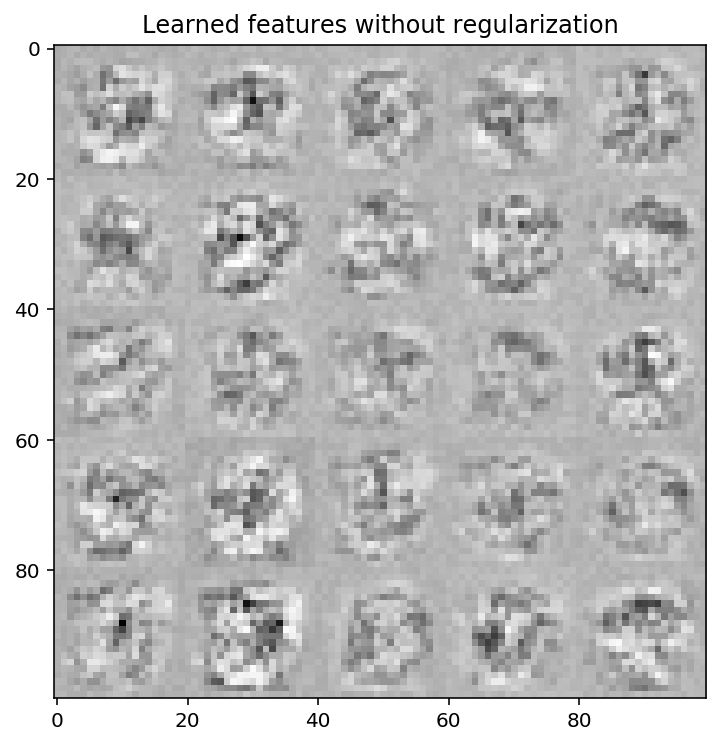

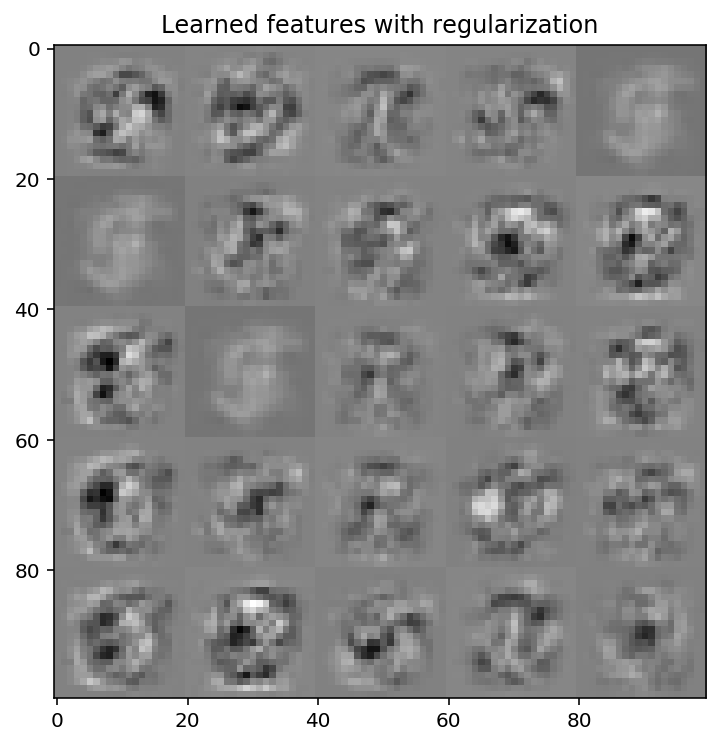

In [12]:
W1bar = W1_no_regularization[:,1:].T
display_data(W1bar,20,20,5,5,'Learned features without regularization')

W1bar = W1[:,1:].T
display_data(W1bar,20,20,5,5,'Learned features with regularization')